In [2]:
import numpy as np
from helper_methods_cy import *
# import pyximport; pyximport.install(setup_args={
#                               "include_dirs":np.get_include()},
#                   reload_support=True)


from helper_methods_cy import *
from simulation_up_cy import *

from scipy.optimize import brentq
import math
# from simulation_up_cy import *


In [23]:
def rho_alpha(alpha,sim):
    
      
    sim.ChangeAlpha(alpha)
#     print("New Alpha: " + str(alpha))
    
    sim.Reach_steady()
    sim.Run_Sim()
    
#     plt.plot(np.arange(0,len(sim1.rho_)),sim1.rho_)
#     plt.ylim(0,0.12)
#     plt.show()
    
    return sim.getTot_den()


def func_for_brent(alpha,exp_den,*args):
    
    return rho_alpha(alpha,*args) - exp_den

def plot_rho(low_bound,upper_bound,sim,rho_exp):
    
    alpha_ = []
    totden_ = []
    n = 0
    steps = 10 
    
    for i in np.linspace(low_bound,upper_bound,steps):
        
        
#         totden_ += [rho_alpha(i,10,18.03,'kvalue_dummy.dat')]
        totden_ += [rho_alpha(i,sim)-rho_exp]
        alpha_ += [i]
        n += 1
        print(str(n*100/steps)+'% done')
        
        
        
    plt.plot(alpha_,totden_)
    plt.plot(np.linspace(low_bound,upper_bound,steps),[0]*steps,label="Experimental Density")
    plt.xlabel(r"$\alpha$codons/s")
    plt.ylabel(r"$\bar{\rho} - \bar{\rho}_{exp}$")
    plt.title(r"Calculated Ribosomal density vs $\alpha$(codons/s)")
#     plt.legend()
    plt.show()
    
def calcAlpha(args,brac):
    
    alpha, *aux = brentq(func_for_brent,*brac,args = args, full_output= True)
    
    return alpha,aux


def calcAvgAndErr_rho(alpha,sim):
        
    rho_ = []
    
    for i in range(10):
        
        rho_.append(rho_alpha(alpha,sim))

    
    rho_ = np.array(rho_)
    
    mean = np.mean(rho_)
    
    error = np.std(rho_)/math.sqrt(5)
    
    rel_error = error*100/mean
    
    return mean,error,rel_error

def calcAvgAndErr_alpha(args,brac):
    
    alpha_ = []
    
    for i in range(5):
        
        print(i)
        a = calcAlpha(args,brac)
        alpha_.append(a[0])
        
    
    alpha_ = np.array(alpha_)
    
    mean = np.mean(alpha_)
    
    error = np.std(alpha_)/math.sqrt(5)
    
    rel_error = error*100/mean
    
    return mean,error,rel_error

In [17]:
sim9 = Simulation(10, sweeps = 10000)
file_name = '../'+'elongation-rates/'+'YAL003W_rates.dat'
sim9.ExtractRates(file_name,0.1,18.03)

10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done
100.0% done


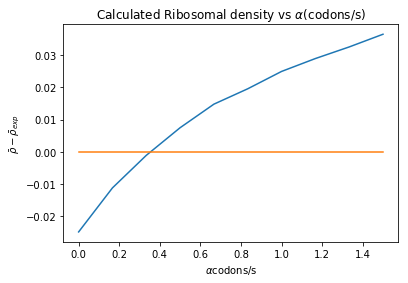

In [24]:
plot_rho(0.00001,1.5,sim9,0.02501)

In [22]:
sim9.LEN

207